In [23]:

%pip install requests beautifulsoup4 pandas matplotlib  

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 3.8 MB/s eta 0:00:0000:0100:01m
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 4.6 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 5.3 MB/s eta 0:00:00a 0:00:01m
Note: you may need to restart the kernel to use updated packages.


In [24]:
import requests  
from bs4 import BeautifulSoup  
import pandas as pd  
import re  
import matplotlib.pyplot as plt  
  
print("All libraries imported successfully") 

All libraries imported successfully


In [25]:
# Scrape Wikipedia page  
url = "https://en.wikipedia.org/wiki/20th_century"  
response = requests.get(url)  
soup = BeautifulSoup(response.content, 'html.parser')

In [26]:
# Extract the main content  
content = soup.find(id="mw-content-text").get_text()  

In [28]:
# Save the content to a text file  
with open('20th_century_events.txt', 'w', encoding='utf-8') as f:  
    f.write(content) 

    print("Content scraped and saved to 20th_century_events.txt")  

Content scraped and saved to 20th_century_events.txt


In [29]:
# Preview first 20 lines  
with open('20th_century_events.txt', 'r', encoding='utf-8') as f:  
    for i in range(20):  
        line = f.readline().strip()  
        if line:  # Only print non-empty lines  
            print(line) 

One hundred years, from 1901 to 2000
For other uses, see 20th century (disambiguation).
Earthrise, taken on December 24, 1968 by astronaut William "Bill" Anders during the Apollo 8 space mission. It was the first photograph taken of Earth from lunar orbit.
Millennia
2nd millennium
Centuries
19th century
20th century
21st century
Timelines
19th century
20th century
21st century
State leaders
19th century
20th century


In [30]:
# Read the file and extract events  
with open('20th_century_events.txt', 'r', encoding='utf-8') as f:  
    text = f.read()  

In [31]:
# Extract lines with years  
events = re.findall(r'(\b19\d{2}\b|\b20\d{2}\b)[^\n]*', text)  
df_events = pd.DataFrame(events, columns=['Event']) 

In [32]:
# Display first 10 events  
print("First 10 events found:")  
print(df_events.head(10))  

First 10 events found:
  Event
0  1901
1  1968
2  1901
3  1914
4  1945
5  1945
6  1991
7  1963
8  1972
9  1901


In [33]:
# Extract years and create decade visualization  
years = [re.search(r'(\b19\d{2}\b|\b20\d{2}\b)', event) for event in events]  
years = [int(match.group()) for match in years if match]  

In [34]:
# Group by decade  
decades = [year // 10 * 10 for year in years]  
decade_counts = pd.Series(decades).value_counts().sort_index() 

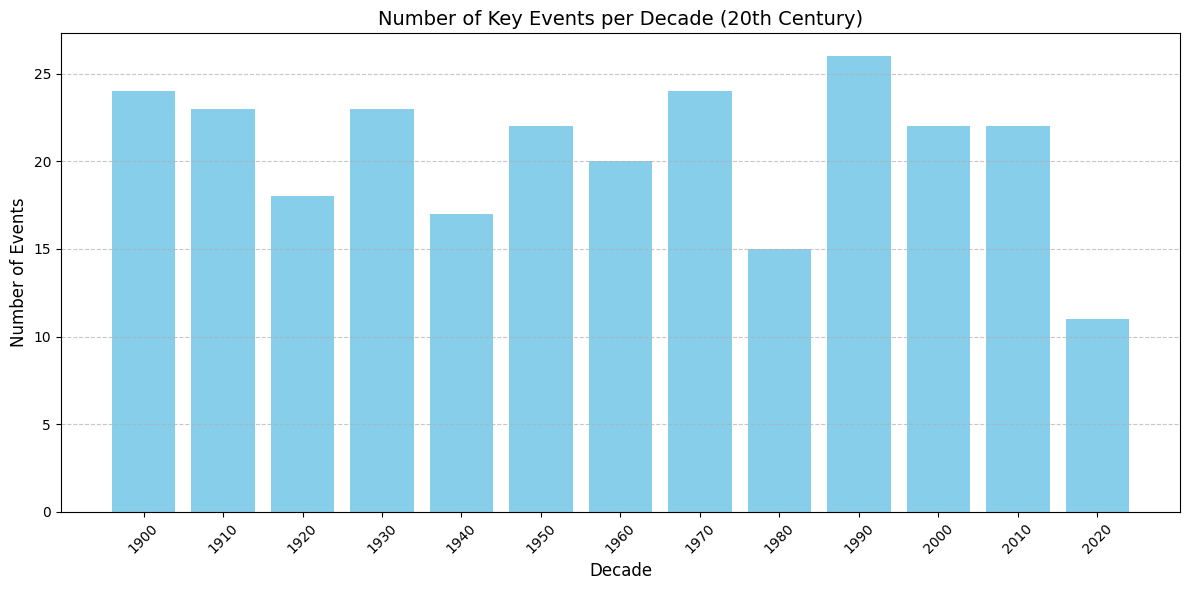

In [35]:
# Create the plot  
plt.figure(figsize=(12, 6))  
plt.bar(decade_counts.index.astype(str), decade_counts.values, color='skyblue')  
plt.xlabel('Decade', fontsize=12)  
plt.ylabel('Number of Events', fontsize=12)  
plt.title('Number of Key Events per Decade (20th Century)', fontsize=14)  
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.tight_layout() 

In [36]:
# Show the plot  
plt.show()  

In [37]:
# Print decade-wise counts  
print("\nDecade-wise event counts:")  
print(decade_counts.sort_index())  


Decade-wise event counts:
1900    24
1910    23
1920    18
1930    23
1940    17
1950    22
1960    20
1970    24
1980    15
1990    26
2000    22
2010    22
2020    11
Name: count, dtype: int64


In [38]:
# Save the events to a CSV file  
df_events.to_csv('20th_century_events.csv', index=False)  
print("Events saved to 20th_century_events.csv") 

Events saved to 20th_century_events.csv


In [39]:
# Initialize git if not already done  
!git init  
  

Reinitialized existing Git repository in /Users/ayshashanazsamsudeen/20th-century/.git/


In [42]:
# Stage files for commit  
!git add 20th_century_scrape.ipynb 20th_century_events.txt 20th_century_events.csv 

In [43]:
# Commit your changes with a descriptive message  
!git commit -m "Added 20th century events analysis with visualization"  

[main f7b5de9] Added 20th century events analysis with visualization
 2 files changed, 498 insertions(+), 140 deletions(-)
 create mode 100644 20th_century_events.csv


In [45]:
# First, pull the remote changes  
!git pull origin main --allow-unrelated-histories  

remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 745 bytes | 149.00 KiB/s, done.
From github.com:AyshaShanaz/20th-century
 * branch            main       -> FETCH_HEAD
 * [new branch]      main       -> origin/main
hint: You have divergent branches and need to specify how to reconcile them.
hint: You can do so by running one of the following commands sometime before
hint: your next pull:
hint: 
hint:   git config pull.rebase false  # merge
hint:   git config pull.rebase true   # rebase
hint:   git config pull.ff only       # fast-forward only
hint: 
hint: You can replace "git config" with "git config --global" to set a default
hint: preference for all repositories. You can also pass --rebase, --no-rebase,
hint: or --ff-only on the command line to override the configured default per
hint: invocation.
fatal: N

In [46]:
# Then stage your files again  
!git add 20th_century_scrape.ipynb 20th_century_events.txt 20th_century_events.csv  

In [47]:
# Commit your changes  
!git commit -m "Added 20th century events analysis with visualization" 

[main c39fd36] Added 20th century events analysis with visualization
 1 file changed, 33 insertions(+), 1 deletion(-)


In [48]:
# Finally, push your changes  
!git push origin main 

To github.com:AyshaShanaz/20th-century.git
 ! [rejected]        main -> main (non-fast-forward)
error: failed to push some refs to 'github.com:AyshaShanaz/20th-century.git'
hint: Updates were rejected because the tip of your current branch is behind
hint: its remote counterpart. Integrate the remote changes (e.g.
hint: 'git pull ...') before pushing again.
hint: See the 'Note about fast-forwards' in 'git push --help' for details.


In [49]:
!git remote -v  


origin	git@github.com:AyshaShanaz/20th-century.git (fetch)
origin	git@github.com:AyshaShanaz/20th-century.git (push)


In [50]:
# Fetch the remote changes  
!git fetch origin main  

From github.com:AyshaShanaz/20th-century
 * branch            main       -> FETCH_HEAD


In [51]:
# Set up git configuration (needed for pull)  
!git config --global user.email "shanazdeen91@gmail.com"  
!git config --global user.name "AyshaShanaz" 

In [52]:
# Pull with allow unrelated histories  
!git pull origin main --allow-unrelated-histories 

From github.com:AyshaShanaz/20th-century
 * branch            main       -> FETCH_HEAD
hint: You have divergent branches and need to specify how to reconcile them.
hint: You can do so by running one of the following commands sometime before
hint: your next pull:
hint: 
hint:   git config pull.rebase false  # merge
hint:   git config pull.rebase true   # rebase
hint:   git config pull.ff only       # fast-forward only
hint: 
hint: You can replace "git config" with "git config --global" to set a default
hint: preference for all repositories. You can also pass --rebase, --no-rebase,
hint: or --ff-only on the command line to override the configured default per
hint: invocation.
fatal: Need to specify how to reconcile divergent branches.


In [53]:
# 1. First, set the pull strategy to merge  
!git config pull.rebase false 

In [54]:
# 2. Configure your git identity (replace with your actual email)  
!git config --global user.email "shanazdeen91@gmail.com"  
!git config --global user.name "AyshaShanaz"

In [ ]:
# 3. Pull with merge strategy  
!git pull origin main --allow-unrelated-histories 

From github.com:AyshaShanaz/20th-century
 * branch            main       -> FETCH_HEAD
hint: Waiting for your editor to close the file... 7[>4;2m="~/20th-century/.git/MERGE_MSG" 6L, 285B▽  Pzz\[0%m           [>c]10;?]11;?Merge branch 'main' of github.com:AyshaShanaz/20th-century
# Please enter a commit message to explain why this merge is necessary,# especially if it merges an updated upstream into a topic branch.#
# Lines starting with '#' will be ignored, and an empty message aborts
# the commit.
~                                                                               ~                                                                               ~                                                                               ~                                                                               ~                                                                               ~                                                                               ~    